In [14]:
#生成线性不可分的数据
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
x,y = make_circles(n_samples=1000,noise=0.2,factor=0.5,)
x = StandardScaler().fit_transform(x)#数据标准化
print(x.shape)
print(y.shape)

(1000, 2)
(1000,)


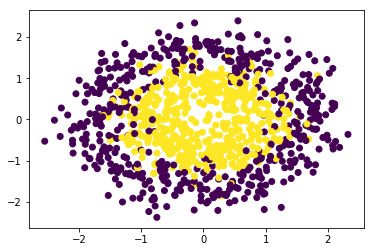

In [15]:
#数据概览
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [17]:
#划分测试集和训练集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 2)
(250, 2)
(750,)
(250,)


In [23]:
#利用高斯核函数进行分类
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
gird_svm = GridSearchCV(SVC(),param_grid={'C':[0.1,1,10],'gamma':[1,0.1,0.01]},cv=10)
gird_svm.fit(x,y)
print(gird_svm.best_params_,gird_svm.best_score_)

{'C': 1, 'gamma': 1} 0.885


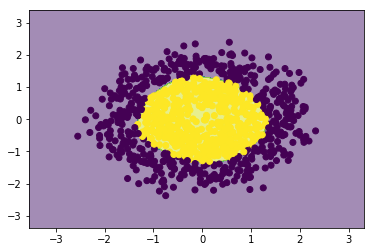

In [35]:
#等高线图分类效果展示
import numpy as np
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.02),
                     np.arange(y_min, y_max, 0.02))
z = gird_svm.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [37]:
#列出网格搜索下不同参数的搜索效果

means = gird_svm.cv_results_['mean_test_score']

params = gird_svm.cv_results_['params']

for mean,param in zip(means,params):

    print("score:%f paras:   %r" % (mean,param))

score:0.882000 paras:   {'C': 0.1, 'gamma': 1}
score:0.878000 paras:   {'C': 0.1, 'gamma': 0.1}
score:0.617000 paras:   {'C': 0.1, 'gamma': 0.01}
score:0.885000 paras:   {'C': 1, 'gamma': 1}
score:0.884000 paras:   {'C': 1, 'gamma': 0.1}
score:0.618000 paras:   {'C': 1, 'gamma': 0.01}
score:0.880000 paras:   {'C': 10, 'gamma': 1}
score:0.882000 paras:   {'C': 10, 'gamma': 0.1}
score:0.877000 paras:   {'C': 10, 'gamma': 0.01}
